In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/mail_data.csv')

In [3]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


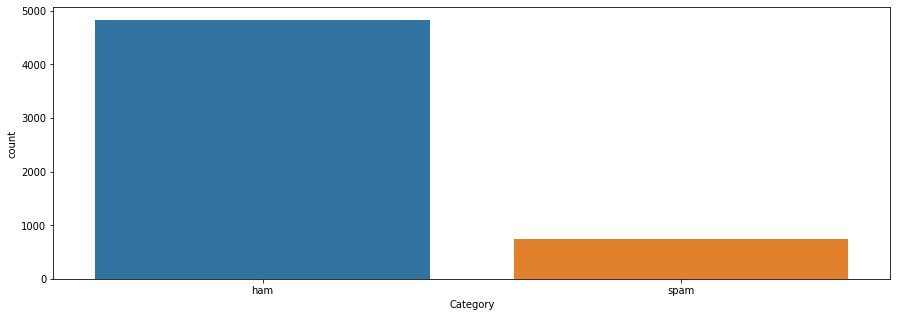

In [5]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])

In [6]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [7]:
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
df.loc[df['Category']=='spam','Category']=0
df.loc[df['Category']=='ham','Category']=1

In [9]:
x=df['Category']
y=df['Message']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [12]:

from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
feature_extraction=TfidfVectorizer

In [29]:
feature_extraction=TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

In [32]:
y_train

1915    New TEXTBUDDY Chat 2 horny guys in ur area 4 j...
1056                             I'm at work. Please call
3717              Networking technical support associate.
5375    I cant pick the phone right now. Pls send a me...
945     I sent my scores to sophas and i had to do sec...
                              ...                        
3335    That's fine, have him give me a call if he kno...
1099    NO GIFTS!! You trying to get me to throw mysel...
2514    U have won a nokia 6230 plus a free digital ca...
3606                      Jordan got voted out last nite!
2575    Your next amazing xxx PICSFREE1 video will be ...
Name: Message, Length: 3900, dtype: object

In [33]:
y_train_features = feature_extraction.fit_transform(y_train)

In [34]:
y_test_features = feature_extraction.transform(y_test)

In [37]:
x_test= x_test.astype('int')

In [40]:
x_test

5086    1
2120    1
2318    1
2917    1
1352    1
       ..
5279    1
1709    1
1054    1
2238    1
248     1
Name: Category, Length: 1672, dtype: int64

In [42]:
x_train = np.array(x_train, dtype=np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [43]:
x_train_

array([0, 1, 1, ..., 0, 1, 0])

In [44]:
y_train_features

<3900x6942 sparse matrix of type '<class 'numpy.float64'>'
	with 30455 stored elements in Compressed Sparse Row format>

In [46]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression()

In [47]:
model.fit(y_train_features,x_train)

LogisticRegression()

In [49]:
from sklearn.metrics import accuracy_score

In [52]:
predictor=model.predict(y_train_features)
accu=accuracy_score(x_train,predictor)
print(accu)

0.9661538461538461


In [53]:
predictor=model.predict(y_test_features)
accu=accuracy_score(x_test,predictor)
print(accu)

0.9557416267942583
